In [105]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [106]:
dataset = pd.read_csv('./PokemonData.csv')
dataset.head()

,Num,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,2,Ivysaur,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
2,3,Venusaur,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False
3,3,VenusaurMega Venusaur,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False
4,4,Charmander,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False


In [107]:
# удаляем ненужные строки
dataset.drop(['Name', 'Type2'], axis=1, inplace=True)
dataset.head()

,Num,Type1,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Grass,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,2,Grass,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
2,3,Grass,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False
3,3,Grass,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False
4,4,Fire,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Num         800 non-null    int64  
 1   Type1       800 non-null    object 
 2   HP          793 non-null    float64
 3   Attack      782 non-null    float64
 4   Defense     790 non-null    float64
 5   SpAtk       782 non-null    float64
 6   SpDef       789 non-null    float64
 7   Speed       791 non-null    float64
 8   Generation  792 non-null    float64
 9   Legendary   800 non-null    bool   
dtypes: bool(1), float64(7), int64(1), object(1)
memory usage: 57.2+ KB


In [109]:
# ищем пропуски
dataset.isna().sum()

Num            0
Type1          0
HP             7
Attack        18
Defense       10
SpAtk         18
SpDef         11
Speed          9
Generation     8
Legendary      0
dtype: int64

In [110]:
# удаляем строки с пропусками
dataset.dropna(subset=['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Generation'], axis=0, inplace=True)

In [111]:
dataset

,Num,Type1,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Grass,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,2,Grass,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
2,3,Grass,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False
3,3,Grass,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False
4,4,Fire,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...
793,717,Dark,126.0,131.0,95.0,131.0,98.0,99.0,6.0,True
794,718,Dragon,108.0,100.0,121.0,81.0,95.0,95.0,6.0,True
795,719,Rock,50.0,100.0,150.0,100.0,150.0,50.0,6.0,True
796,719,Rock,50.0,160.0,110.0,160.0,110.0,110.0,6.0,True


In [112]:
# разделение на объекты-признаки и целевой признак
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [113]:
# кодируем категориальные данные из строк в числа
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 0.0, ..., 65.0, 45.0, 1.0],
       [0.0, 0.0, 0.0, ..., 80.0, 60.0, 1.0],
       [0.0, 0.0, 0.0, ..., 100.0, 80.0, 1.0],
       ...,
       [0.0, 0.0, 0.0, ..., 150.0, 50.0, 6.0],
       [0.0, 0.0, 0.0, ..., 110.0, 110.0, 6.0],
       [0.0, 0.0, 0.0, ..., 90.0, 70.0, 6.0]], dtype=object)

In [115]:
# 1.Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [116]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=45)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9252173913043479, 0.9236111111111112)

In [117]:
# 3.Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=45), X, y, cv=45)
np.mean(scores)

0.9249074074074073

In [118]:
cm1 = confusion_matrix(y_test, target1_1, labels = cl1_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied'])

In [128]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,45,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
         39, 41, 43])}]

In [129]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=45, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 7}

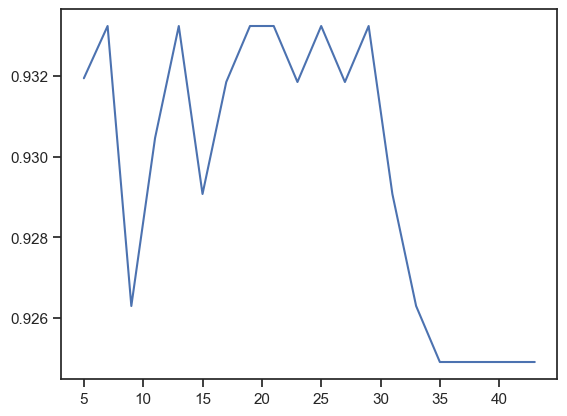

In [130]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [171]:
# Повторный подбор
n_range = np.array(range(5,15,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=20, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 10}

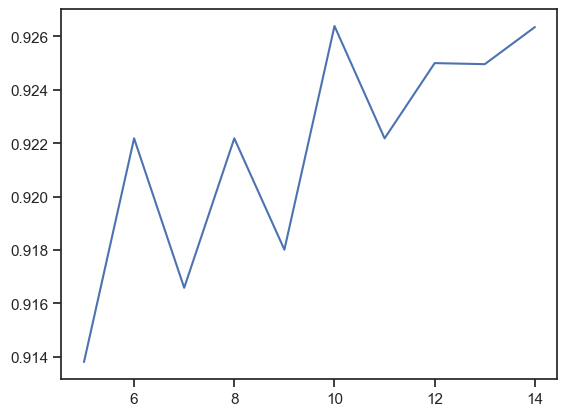

In [172]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [173]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs.best_estimator_.fit(X_train, y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(0.9373913043478261, 0.9305555555555556)

In [174]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9252173913043479, 0.9236111111111112)

In [175]:
cm2 = confusion_matrix(y_test, target2_1, labels = clf_gs.classes_)

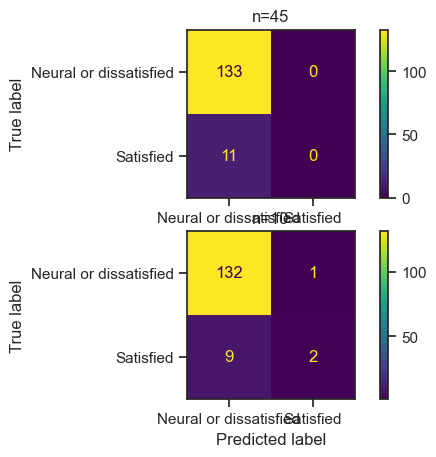

In [176]:
fig, ax = plt.subplots(2,1)
ax[0].set_title("n=45")
ax[1].set_title("n=10")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[1]);

In [178]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [179]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\mani2\\Desktop\\ТМО\\lab_TMO\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

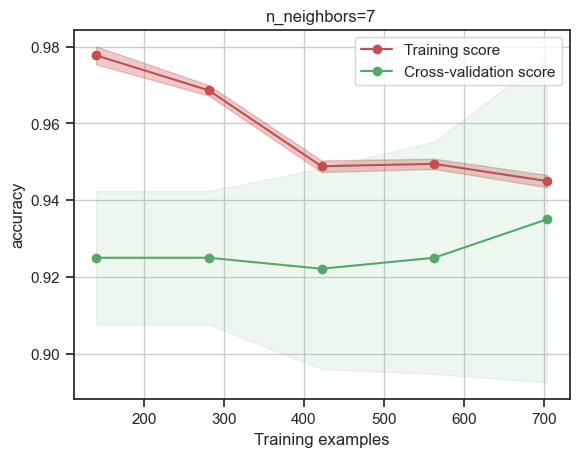

In [180]:
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=7', X, y, cv=50, train_sizes=np.linspace(.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'c:\\Users\\mani2\\Desktop\\ТМО\\lab_TMO\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

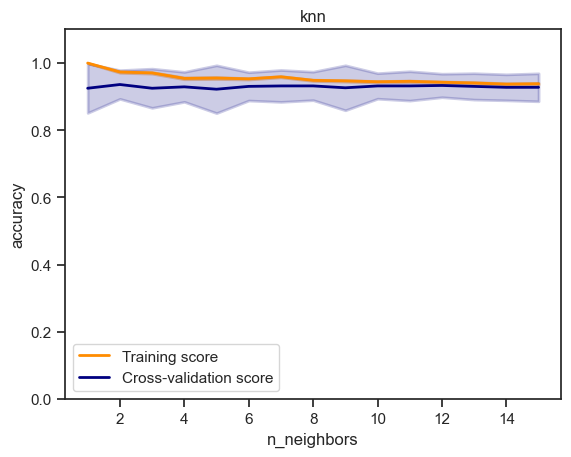

In [181]:
n_range2 = np.array(range(1,16,1))
plot_validation_curve(clf_gs.best_estimator_, 'knn', X, y, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=30, scoring="accuracy")